In [1]:
import requests
import re 


In [2]:
#downloading the page for Ed-Sheeran

wbpg = requests.get('https://www.lyrics.com/artist/Ed-Sheeran/2342870')

print(wbpg)

<Response [200]>


In [3]:
# Looking at some of the attributes of a downloaded webpage

print(f"""status : {wbpg.status_code}
url: {wbpg.url}
encoding: {wbpg.encoding}
partoftext: {wbpg.text[10:100]}\n""")

status : 200
url: https://www.lyrics.com/artist/Ed-Sheeran/2342870
encoding: UTF-8
partoftext:  html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->




In [4]:
#Save the page to a text file

file = open("lyrics.html", "w")
file.write(wbpg.text)
file.close()

In [5]:
#Open the page in a text editor

file = open("lyrics.html", "r")
read_web = file.read()
print(read_web)
file.close()


<!doctype html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]--><head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<title>Ed Sheeran Lyrics, Songs and Albums | Lyrics.com</title>
<meta name="description" content="Ed Sheeran Lyrics - All the great songs and their lyrics from Ed Sheeran on Lyrics.com">
<meta name="keywords" content="Ed Sheeran lyrics, Ed Sheeran song lyrics, Ed Sheeran lyric">
<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">
<base href="https://www.lyrics.com/">

<script>
s4Prefix = 'https://static.stands4.com';
version = '1.3.90';
</script>

<!-- Bootstrap compiled and minified CSS -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/

## Downloading and saving the lyrics manually

In [ ]:
#Copy a few of the songs' links into a list and complete them

links = ["/lyric/36137186/Ed+Sheeran/Lay+It+All+on+Me", 
         "/lyric/36370638/Ed+Sheeran/Best+Part+of+Me", 
         "/lyric/35442158/Ed+Sheeran/Candle+in+the+Wind"]

complete_links =[]

for link in links:
    complete_links.append('https://www.lyrics.com' + link)

print(complete_links)

In [ ]:
#download a few songs and save each song to a different file
import os.path

save_path = './lyrics/manual/'

for i, link in enumerate(complete_links):
    song = requests.get(link)
    file_name = save_path + 'song_num_' + str(i) + '.txt'
    file = open(file_name, 'w')
    file.write(song.text)
    file.close()

In [ ]:
## another way of naming

import os.path

save_path = './lyrics/Ed_Sheeran/manual/'
names = ['lay_it_all_on_me', 'best_part_of_me', 'candle_in_the_wind']


for i, link in enumerate(complete_links):
    song = requests.get(link)
    file_name = save_path + names[i] + '.txt'
    file = open(file_name, 'w')
    file.write(song.text)
    file.close()

In [7]:
web_html = wbpg.text
web_html

'\n<!doctype html>\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]--><head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<title>Ed Sheeran Lyrics, Songs and Albums | Lyrics.com</title>\n<meta name="description" content="Ed Sheeran Lyrics - All the great songs and their lyrics from Ed Sheeran on Lyrics.com">\n<meta name="keywords" content="Ed Sheeran lyrics, Ed Sheeran song lyrics, Ed Sheeran lyric">\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1">\n<base href="https://www.lyrics.com/">\n\n<script>\ns4Prefix = \'https://static.stands4.com\';\nversion = \'1.3.90\';\n</script>\n\n<!-- Bootstrap compiled and minified CSS -->\n<link rel="stylesheet" href="https:/

## Downloading and saving the lyrics using Regex

In [ ]:
#automate extracting the lyrics links with Regex

# example of hyperlink line on website: 
#<a href="/lyric/36137186/Ed+Sheeran/Lay+It+All+on+Me">Lay It All on Me</a>

pattern = r'<a href=(["\'])(\/lyric\/.*?)\1'
links = re.findall(pattern = pattern, string = web_html)

song_num = len(links)
song_num


complete_links =[]
for index, link in enumerate(links):
    if index<50:
        complete_links.append('https://www.lyrics.com' + links[index][1])

save_path = './lyrics/Ed_Sheeran/regex/'

for i, link in enumerate(complete_links):
    song = requests.get(link)
    file_name = save_path + 'song_num_' + str(i) + '.html'
    file = open(file_name, 'w')
    file.write(song.text)
    file.close()



In [ ]:
##Total number of songs = 621

len(links)

## Downloading and saving the lyrics using BeautifulSoup

In [8]:
#Using the BeautifulSoup object

from bs4 import BeautifulSoup

web_soup = BeautifulSoup(web_html, 'html.parser')
print(f"""{type(web_soup)} \n {web_soup}""")

<class 'bs4.BeautifulSoup'> 
 
<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en"> <!--<![endif]--><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Ed Sheeran Lyrics, Songs and Albums | Lyrics.com</title>
<meta content="Ed Sheeran Lyrics - All the great songs and their lyrics from Ed Sheeran on Lyrics.com" name="description"/>
<meta content="Ed Sheeran lyrics, Ed Sheeran song lyrics, Ed Sheeran lyric" name="keywords"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<base href="https://www.lyrics.com/"/>
<script>
s4Prefix = 'https://static.stands4.com';
version = '1.3.90';
</script>
<!-- Bootstrap compiled and minified CSS -->
<link href="https://maxcdn

In [294]:
class_list_ed = web_soup.find_all('td', attrs = {'class': "tal qx"})
class_list_ed 
# example: <td class="tal qx"><strong><a href="/lyric/36131004/Ed+Sheeran/Lay+It+All+on+Me">Lay It All on Me</a></strong></td>

[<td class="tal qx"><strong><a href="/lyric/36137186/Ed+Sheeran/Lay+It+All+on+Me">Lay It All on Me</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36131004/Ed+Sheeran/Lay+It+All+on+Me">Lay It All on Me</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36370642/Ed+Sheeran/BLOW">BLOW</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36355896/Ed+Sheeran/Beautiful+People">Beautiful People</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36370638/Ed+Sheeran/Best+Part+of+Me">Best Part of Me</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36234915/Ed+Sheeran/Cross+Me">Cross Me</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36156455/Ed+Sheeran/Beast+of+Burden">Beast of Burden</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36221045/Ed+Sheeran/I+Don%27t+Care">I Don't Care</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36259016/Ed+Sheeran/Beautiful+People">Beautiful People</a></st

In [297]:
# Function for downloading the lyrics of a singer

def lyric_down(path,class_list, n = 101):
    
    """This function download the lyrics of a singer from the given class 
    and saves it into the given path"""
    
    for index , element in enumerate(class_list):
        if index < n:
            line = element.find_all('a')[0]
            h_link = re.findall(pattern ='<a href="(.+)">(.+)</a>', string = str(line))
            link = 'https://www.lyrics.com' + h_link[0][0]
            song = requests.get(link)
            song_html = song.text

            lyric_soup = BeautifulSoup(song_html, 'html.parser')
            lyric_text = lyric_soup.find_all('pre', attrs = {'class': "lyric-body"})

            file_name = path + 'song_num_' + str(index) + '.txt'
            file = open(file_name, 'w')
            file.write(lyric_text[0].text)
            file.close()


In [ ]:
path_ed = './lyrics/Ed_Sheeran/beautifulsoup/'
lyric_down(path_ed, class_list_ed)

In [12]:
##Total number of songs = 714 but why it is bigger than what regex found?!
complete_links =[]

for index , element in enumerate(class_list):
    line = element.find_all('a')[0]
    h_link = re.findall(pattern ='<a href="(.+)">(.+)</a>', string = str(line))
#     print(h_link[0][0])
    link = 'https://www.lyrics.com' + h_link[0][0]
    complete_links.append(link)
len(complete_links)

714

## Bag of Words with song lyrics

In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### Adding another singer

In [19]:
#downloading the page for Taylor-Swift

wbpg_ts = requests.get('https://www.lyrics.com/artist/Taylor-Swift/816977')

print(wbpg_ts)

<Response [200]>


In [20]:
#Save the page to a text file (Taylor-Swift)

file = open("ts_lyrics.html", "w")
file.write(wbpg_ts.text)
file.close()

In [21]:
#Using the BeautifulSoup object (Taylor-Swift)

ts_html = wbpg_ts.text
ts_soup = BeautifulSoup(ts_html, 'html.parser')

In [30]:
#Finding the class including the hyperlinks of lyrics (Taylor-Swift)

class_list_ts = ts_soup.find_all('td', attrs = {'class': "tal qx"})
class_list_ts

[<td class="tal qx"><strong><a href="/lyric/35948709/Taylor+Swift/Look+What+You+Made+Me+Do">Look What You Made Me Do</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35965938/Taylor+Swift/Love+Story">Love Story</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/35965923/Taylor+Swift/Mine">Mine</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36467503/Taylor+Swift/Lover">Lover</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36467499/Taylor+Swift/I+Forgot+That+You+Existed">I Forgot That You Existed</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36497125/Taylor+Swift/Cruel+Summer">Cruel Summer</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36467502/Taylor+Swift/The+Man">The Man</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36467501/Taylor+Swift/The+Archer">The Archer</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/36467500/Taylor+Swift/I+Think+He+Knows">I Think He Knows</

In [ ]:
#Downloading the lyrics Taylor

path_ts = './lyrics/Taylor_Swift/beautifulsoup/'
lyric_down(path_ad, class_list_ts)

### Text Preprocessing for each lyric and creating the corpus


* Removing numbers, punctuations and new lines 

* Normalisation: Stemming/Lemmatisation ---> I choose stemming (reasons: having two languages, faster and less computationally expensiv)
  

In [213]:
# Function for creating corpus

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

def corpus(path, n= 101):
    """This function reads each text file (in total 101 files), cleans it by removing 
    numbers, new lines and punctuations except apostrophe. Then it will stemm the words 
    and finally creats a corpus of cleaned stemmed lyrics. """
    
    total_stemmed = []
    for i in range (n):
        stemmed_text = []
        file_name = path + 'song_num_' + str(i) + '.txt'
        file = open(file_name, "r")
        text = file.read()

        text_clean1 = re.sub(r"[^\w\s']", '', text)      #rmv punctuations exc apostrophe 
        text_clean2= re.sub(r'[\n]', ' ', text_clean1)   #rmv new lines
        text_clean3 = re.sub(r'[0-9]+', '', text_clean2)  #rmv numbers

        words = word_tokenize(text_clean3)                #spliting each song into words
        for word in words:                                # stemming words
            new_word = ps.stem(word)                 
            stemmed_text.append(new_word)           #appending stemmed words to a list
#             print(stemmed_text)

        total_stemmed.append(stemmed_text)       #appending stemmed songs to a list
#         print(total_stemmed)
        file.close()


    corpus=[0]*n                                #combining stemmed words of each song
    for index, song in enumerate(total_stemmed):   #creating corpus of songs (cleaned words)
        corpus[index] = ' '.join(total_stemmed[index])    

    return corpus


In [214]:
#Ed Sheeran corpus

path_ed = './lyrics/Ed_Sheeran/beautifulsoup/'
corpus_ed = corpus(path_ed)
# corpus_ed[2]

In [215]:
# Taylor Swift corpus
path_ts = './lyrics/Taylor_Swift/beautifulsoup/'
corpus_ts = corpus(path_ts)
# corpus_ts[0]

### Creating the matrix (vectorizing corpus) and then Normalizing using TF-IDF and finally creating a data frame for each artist

In [216]:
vectorizer = CountVectorizer(stop_words="english")
matrix_ed = vectorizer.fit_transform(corpus_ed)
# matrix_ed.todense()


In [217]:
df_ed = pd.DataFrame(matrix_ed.todense(), columns=vectorizer.get_feature_names_out())
df_ed

,abort,abov,acabar,acción,accompagnato,acobardarm,acr,act,actual,acá,...,york,youd,youll,young,younger,youth,yup,zale,zion,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
#Ed Sheeran 

vectorizer = CountVectorizer(stop_words="english")
matrix_ed = vectorizer.fit_transform(corpus_ed)

tf = TfidfTransformer()

transformed_ed = tf.fit_transform(matrix_ed)
tdf_ed = pd.DataFrame(transformed_ed.todense(), columns=vectorizer.get_feature_names_out())
tdf_ed['artist'] = 'Ed Sheeran'
tdf_ed.head(4)

,abort,abov,acabar,acción,accompagnato,acobardarm,acr,act,actual,acá,...,youd,youll,young,younger,youth,yup,zale,zion,zoom,artist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ed Sheeran
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ed Sheeran
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ed Sheeran
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ed Sheeran


In [219]:
# Taylor Swift

matrix_ts = vectorizer.fit_transform(corpus_ts)

tf = TfidfTransformer()

transformed_ts = tf.fit_transform(matrix_ts)
tdf_ts = pd.DataFrame(transformed_ts.todense(), columns=vectorizer.get_feature_names_out())
tdf_ts['artist'] = 'Taylor Swift'
tdf_ts.head(4)

,abov,accent,accid,achil,act,actress,actual,admit,ador,afraid,...,ya,ye,yeah,year,yesterday,york,youd,young,younger,artist
0,0.0,0.0,0.0,0.0,0.0,0.166748,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Taylor Swift
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.065655,...,0.0,0.227949,0.0,0.000000,0.0,0.0,0.0,0.106189,0.0,Taylor Swift
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.232516,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,Taylor Swift
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.065847,0.0,0.0,0.0,0.071879,0.0,Taylor Swift


### Stacking the data frames of two artists and filling NaNs with zero

In [220]:
df = pd.concat([tdf_ed,tdf_ts])
df.shape

# It seems that we had 858 common columns that merged

(202, 2699)

In [221]:
df.isna().sum().sum()

185941

In [222]:
df = df.fillna(0)
df.isna().sum().sum()

0

## Fitting a  classification model (LogisticRegression)

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [317]:

X = df.drop(['artist'], axis = 1)
y = df['artist']


In [225]:
X.head(4)

,abort,abov,acabar,acción,accompagnato,acobardarm,acr,act,actual,acá,...,wolv,wood,wore,wors,worship,worst,worth,wound,wreck,yesterday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             91,  92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', length=202)

In [227]:
df.reset_index()

,index,abort,abov,acabar,acción,accompagnato,acobardarm,acr,act,actual,...,wolv,wood,wore,wors,worship,worst,worth,wound,wreck,yesterday
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.072762,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# checking if I have repetition in the column names (words)

import numpy

array = df.columns.duplicated()
with numpy.printoptions(threshold=numpy.inf):
    print(array)

In [318]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=40)


In [252]:

m_lr = LogisticRegression()
m_lr.fit(x_train, y_train)

LogisticRegression()

In [272]:
lr_tr = m_lr.score(x_train, y_train)
lr_tr

0.9801324503311258

In [273]:
lr_ts = m_lr.score(x_test, y_test)
lr_ts

0.8431372549019608

In [255]:
m_lr.predict(x_train)

array(['Ed Sheeran', 'Taylor Swift', 'Taylor Swift', 'Ed Sheeran',
       'Taylor Swift', 'Ed Sheeran', 'Taylor Swift', 'Ed Sheeran',
       'Ed Sheeran', 'Taylor Swift', 'Ed Sheeran', 'Taylor Swift',
       'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift',
       'Taylor Swift', 'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift', 'Taylor Swift',
       'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift', 'Taylor Swift',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift',
       'Taylor Swift', 'Taylor Swift', 'Ed Sheeran', 'Taylor Swift',
       'Ed Sheeran', 'Taylor Swift', 'Ed Sheeran', 'Taylor Swift',
       'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift',
       'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift',
       'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift', 'Ed Sheeran',

In [256]:
m_lr.predict(x_test)

array(['Ed Sheeran', 'Ed Sheeran', 'Taylor Swift', 'Ed Sheeran',
       'Taylor Swift', 'Ed Sheeran', 'Taylor Swift', 'Taylor Swift',
       'Ed Sheeran', 'Taylor Swift', 'Ed Sheeran', 'Taylor Swift',
       'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift',
       'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift',
       'Taylor Swift', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift',
       'Taylor Swift', 'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran',
       'Taylor Swift', 'Ed Sheeran', 'Taylor Swift', 'Taylor Swift',
       'Taylor Swift', 'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift',
       'Ed Sheeran', 'Taylor Swift', 'Ed Sheeran', 'Taylor Swift',
       'Ed Sheeran', 'Taylor Swift', 'Taylor Swift', 'Taylor Swift',
       'Ed Sheeran', 'Ed Sheeran', 'Taylor Swift'], dtype=object)

## Fitting the Naive Bayes model

In [257]:
from sklearn.naive_bayes import MultinomialNB

m_nb = MultinomialNB(alpha=0.01)
m_nb.fit(x_train, y_train)

MultinomialNB(alpha=0.01)

In [274]:
nb_tr = m_nb.score(x_train, y_train)
nb_tr

0.9801324503311258

In [275]:
nb_ts = m_nb.score(x_test, y_test)
nb_ts

0.9215686274509803

In [665]:
x_train.columns

Index(['abort', 'abov', 'acabar', 'acción', 'accompagnato', 'acobardarm',
       'acr', 'act', 'actual', 'acá',
       ...
       'wolv', 'wood', 'wore', 'wors', 'worship', 'worst', 'worth', 'wound',
       'wreck', 'yesterday'],
      dtype='object', length=2698)

### Probability of a song with the word 'yesterday' for each singer:

In [680]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

test_word = zerolistmaker(2698)
test_word = pd.DataFrame([test_word])
test_word.shape

(1, 2698)

In [682]:
m_nb.predict_proba(test_word).round(2)

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([[0.51, 0.49]])

In [683]:
m_nb.predict(test_word)

/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array(['Ed Sheeran'], dtype='<U12')

## Fitting the Random forest model

In [756]:
from sklearn.ensemble import RandomForestClassifier

m_rf = RandomForestClassifier(n_estimators=60, 
                            max_depth=4, 
                            random_state=30)

In [278]:
m_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=60, random_state=30)

In [279]:
rf_tr = m_rf.score(x_train, y_train) 
rf_ts = m_rf.score(x_test, y_test)
rf_tr , rf_ts

(0.9602649006622517, 0.9607843137254902)

Text(0.5, 1.0, 'Different models on 3 Features')

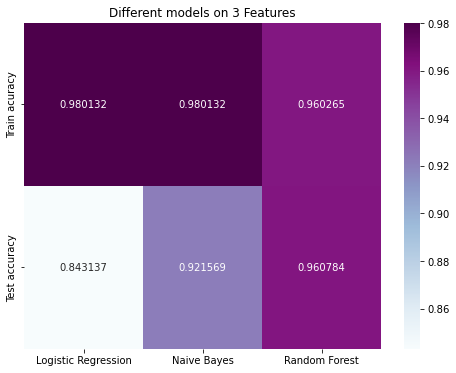

In [363]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [[lr_tr, nb_tr, rf_tr], [lr_ts, nb_ts, rf_ts]]
plt.rcParams['figure.figsize'] = (8, 6)
p = sns.heatmap(data, 
            cmap='BuPu', 
            annot=True, fmt='g',
            linewidths=0, linecolor='white',
            xticklabels= ['Logistic Regression', 'Naive Bayes', 'Random Forest'], 
            yticklabels=['Train acuracy', 'Test accuracy'], 
            )
p.set_title("Different models on 3 Features")

# Class Imbalance

### Adding another artist with less number of songs

In [285]:
#downloading the page for Adele

wbpg_ad = requests.get('https://www.lyrics.com/artist/Adele/861756')

print(wbpg_ts)

<Response [200]>


In [286]:
#Using the BeautifulSoup object (Adele)

ad_html = wbpg_ad.text
ad_soup = BeautifulSoup(ad_html, 'html.parser')

In [289]:
#Finding the class including the hyperlinks of lyrics (Adele)

class_list_ad = ad_soup.find_all('td', attrs = {'class': "tal qx"})
class_list_ad

[<td class="tal qx"><strong><a href="/lyric/33851146/Adele/Hiding+My+Heart">Hiding My Heart</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/33637964/Adele/Hello">Hello</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/32298027/Adele/Hello">Hello</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/32298036/Adele/Send+My+Love+%28To+Your+New+Lover%29">Send My Love (To Your New Lover)</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/32298035/Adele/I+Miss+You">I Miss You</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/32298034/Adele/When+We+Were+Young">When We Were Young</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/32298033/Adele/Remedy">Remedy</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/32298032/Adele/Water+Under+the+Bridge">Water Under the Bridge</a></strong></td>,
 <td class="tal qx"><strong><a href="/lyric/32298031/Adele/River+Lea">River Lea</a></strong></td>,
 <td class="tal qx"><st

In [296]:
#Downloading the lyrics (Adele)

path_ad = './lyrics/Adele/beautifulsoup/'
lyric_down(path_ad, class_list_ad, n=11)

In [553]:
#Adele corpus

corpus_ad = corpus(path_ad, n=11)
# corpus_ad[2]

In [684]:
#Adele dataframe

vectorizer = CountVectorizer(stop_words="english")
matrix_ad = vectorizer.fit_transform(corpus_ad)

tf = TfidfTransformer()

transformed_ad = tf.fit_transform(matrix_ad)
tdf_ad = pd.DataFrame(transformed_ad.todense(), columns=vectorizer.get_feature_names_out())
tdf_ad['artist'] = 'Adele'
tdf_ad.head(4)

,accid,admit,advanc,ago,ahyeahyeahyeahyeahyeahyeah,ai,air,alon,alreadi,alway,...,woke,wonder,word,world,ya,yeah,year,young,younger,artist
0,0.056809,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.056809,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,Adele
1,0.000000,0.0,0.0,0.0,0.0,0.034089,0.0,0.0,0.0,0.0,...,0.000000,0.048044,0.0,0.034089,0.048044,0.0,0.037759,0.0,0.048044,Adele
2,0.000000,0.0,0.0,0.0,0.0,0.034089,0.0,0.0,0.0,0.0,...,0.000000,0.048044,0.0,0.034089,0.048044,0.0,0.037759,0.0,0.048044,Adele
3,0.000000,0.0,0.0,0.0,0.0,0.193239,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,Adele


In [685]:
#Combining with the data frame of Ed Sheeran

df_imbalance = pd.concat([tdf_ed,tdf_ad])
df_imbalance.shape


(112, 2055)

In [686]:
df_imbalance.isna().sum().sum()

26655

In [687]:
df_imbalance = df_imbalance.fillna(0)
df_imbalance.isna().sum().sum()

0

### Fitting Random forest with normal sampling

In [558]:
X_imbalance = df_imbalance.loc[:, df_imbalance.columns != 'artist']
# X = df_imbalance.drop(['artist'], axis = 1)
y_imbalance = df_imbalance['artist']


In [559]:
X_imbalance.head(4)

,abort,abov,acabar,acción,accompagnato,acobardarm,acr,act,actual,acá,...,teach,trembl,typic,umm,underestim,unknown,valley,vein,wilder,woke
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [560]:
df_imbalance.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
           dtype='int64', length=112)

In [561]:
df_imbalance.reset_index()

,index,abort,abov,acabar,acción,accompagnato,acobardarm,acr,act,actual,...,teach,trembl,typic,umm,underestim,unknown,valley,vein,wilder,woke
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
108,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.071395,0.0
109,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.033487,0.133947,0.000000,0.0
110,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.076552,0.0,0.000000,0.000000,0.000000,0.0


In [562]:
x_train_imb, x_test_imb, y_train_imb, y_test_imb = train_test_split(X_imbalance, y_imbalance, random_state=80)


In [563]:
m_rf.fit(x_train_imb, y_train_imb)

RandomForestClassifier(max_depth=4, n_estimators=60, random_state=30)

In [564]:
rf_tr_imb = m_rf.score(x_train_imb, y_train_imb) 
rf_ts_imb = m_rf.score(x_test_imb, y_test_imb)
rf_tr_imb , rf_ts_imb

(0.9761904761904762, 0.8571428571428571)

In [565]:
ypred_rf_imb = m_rf.predict(x_test_imb)
ypred_rf_imb

array(['Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran',
       'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran', 'Ed Sheeran'],
      dtype=object)

In [566]:
ypred_rf_imb = pd.Series(ypred_rf_imb) 
type(ypred_rf_imb)

pandas.core.series.Series

In [567]:
type(y_test_imb)

pandas.core.series.Series

In [568]:
ypred_rf_imb

0     Ed Sheeran
1     Ed Sheeran
2     Ed Sheeran
3     Ed Sheeran
4     Ed Sheeran
5     Ed Sheeran
6     Ed Sheeran
7     Ed Sheeran
8     Ed Sheeran
9     Ed Sheeran
10    Ed Sheeran
11    Ed Sheeran
12    Ed Sheeran
13    Ed Sheeran
14    Ed Sheeran
15    Ed Sheeran
16    Ed Sheeran
17    Ed Sheeran
18    Ed Sheeran
19    Ed Sheeran
20    Ed Sheeran
21    Ed Sheeran
22    Ed Sheeran
23    Ed Sheeran
24    Ed Sheeran
25    Ed Sheeran
26    Ed Sheeran
27    Ed Sheeran
dtype: object

In [569]:
y_test_imb

36    Ed Sheeran
8          Adele
0     Ed Sheeran
73    Ed Sheeran
91    Ed Sheeran
48    Ed Sheeran
59    Ed Sheeran
6          Adele
65    Ed Sheeran
87    Ed Sheeran
74    Ed Sheeran
63    Ed Sheeran
62    Ed Sheeran
68    Ed Sheeran
49    Ed Sheeran
82    Ed Sheeran
14    Ed Sheeran
0          Adele
33    Ed Sheeran
99    Ed Sheeran
40    Ed Sheeran
18    Ed Sheeran
85    Ed Sheeran
3          Adele
2     Ed Sheeran
52    Ed Sheeran
13    Ed Sheeran
30    Ed Sheeran
Name: artist, dtype: object

In [789]:
pre_rf_imb = precision_score(y_test_imb, ypred_rf_imb, pos_label= 'Adele')

rec_rf_imb = recall_score(y_test_imb, ypred_rf_imb, pos_label= 'Adele')

f_rf_imb = f1_score(y_test_imb, ypred_rf_imb, pos_label= 'Adele')

pre_rf_imb, rec_rf_imb, f_rf_imb


/home/esharifi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0)

### Random undersampling

In [497]:
from sklearn.metrics import accuracy_score, precision_score, \
recall_score, confusion_matrix, f1_score

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [705]:
# Adele in train and test
sum(y_train_imb=='Adele'), sum(y_test_imb=="Adele")

(7, 4)

In [792]:
r_us = RandomUnderSampler(sampling_strategy={'Ed Sheeran': 7}, 
                         random_state=40)

In [793]:
x_rus, y_rus = r_us.fit_resample(x_train_imb, y_train_imb)

In [794]:
print(f'''unique samples in each class (original): 
{y_train_imb.value_counts()}\n''')
print(f'''unique samples in each class (undersampled):
{y_rus.value_counts()}''')

unique samples in each class (original): 
Ed Sheeran    77
Adele          7
Name: artist, dtype: int64

unique samples in each class (undersampled):
Adele         7
Ed Sheeran    7
Name: artist, dtype: int64


In [795]:
x_rus.shape

(14, 2054)

#### Fitting Random Forest

In [796]:
m_rf_rus = RandomForestClassifier(n_estimators=100, 
                            max_depth=4, 
                            random_state=30)
m_rf_rus.fit(x_rus, y_rus)
ypred_rus = m_rf_rus.predict(x_test_imb)

In [797]:
ypred_rus = pd.Series(ypred_rus)
ypred_rus.unique()

array(['Ed Sheeran', 'Adele'], dtype=object)

In [798]:
ypred_rus.value_counts()

Ed Sheeran    22
Adele          6
dtype: int64

In [799]:
y_test_imb.value_counts()

Ed Sheeran    24
Adele          4
Name: artist, dtype: int64

In [800]:
pre_rf_imb_rus = precision_score(y_test_imb, ypred_rus, pos_label= 'Adele')

rec_rf_imb_rus = recall_score(y_test_imb, ypred_rus, pos_label= 'Adele')

f_rf_imb_rus = f1_score(y_test_imb, ypred_rus, pos_label= 'Adele')

pre_rf_imb_rus, rec_rf_imb_rus, f_rf_imb_rus


(0.16666666666666666, 0.25, 0.2)